In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
file_path = 'cleaned_data.csv'
happiness_df = pd.read_csv(file_path)

happiness_df.head()

,Unnamed: 0,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
corr = happiness_df.corr().style.background_gradient(cmap='coolwarm')
corr


,Unnamed: 0,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
Unnamed: 0,1.000000,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
RANK,1.000000,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
Happiness score,-0.980856,-0.980856,1.000000,0.999333,0.999383,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,-0.978345,-0.978345,0.999333,1.000000,0.997434,0.514099,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,-0.982031,-0.982031,0.999383,0.997434,1.000000,0.483762,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
Dystopia (1.83) + residual,-0.444633,-0.444633,0.498990,0.514099,0.483762,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
GDP per capita,-0.792137,-0.792137,0.763677,0.752104,0.773844,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
social support,-0.773773,-0.773773,0.777889,0.773375,0.781302,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
healthy life expectancy,-0.750945,-0.750945,0.740260,0.727611,0.751530,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
freedom to make life choices,-0.623040,-0.623040,0.624822,0.622934,0.625926,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474


# Freedom to Make Life Choices

Freedom to make life choices is the national average of a binary response (0=no, 1=yes) to the question "Are you satisfied or dissatisfied with your freedom to choice what you do with your life?"

Would it be more appropriate to name this "satisfaction with freedom to make life choices"?

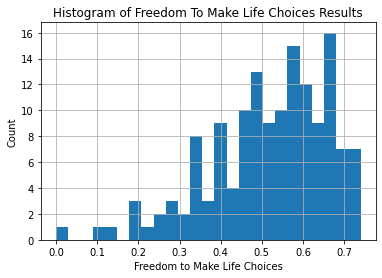

In [4]:
happiness_df['freedom to make life choices'].hist(bins=25)

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Count')
plt.title('Histogram of Freedom To Make Life Choices Results')

plt.show()

The data is fairly normally distributed, but with a left skew.

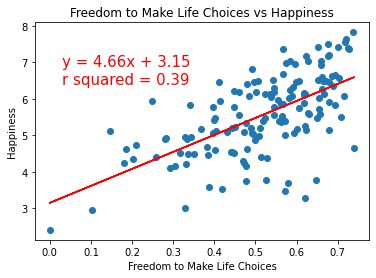

In [5]:
x_axis = happiness_df['freedom to make life choices']
y_axis = happiness_df['Happiness score']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
rsquared = f'r squared = {round(rvalue * rvalue, 2)}'

plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq, (0.03,6.9), fontsize=15, color="red")
plt.annotate(rsquared, (0.03, 6.4), fontsize=15, color="red")

plt.title('Freedom to Make Life Choices vs Happiness')
plt.ylabel('Happiness')
plt.xlabel('Freedom to Make Life Choices')

plt.scatter(x_axis, y_axis)
plt.show()

The correlation between Freedom to Make Life Choices and Happiness is low (rsquared = 0.39). This indicates that our regression has poor prediction power. 

To illustrate this point, let's examine the subset of this data where freedom to make life choices is greater than 0.6 but less than 0.65.

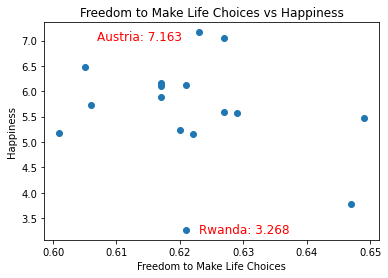

In [6]:
freedom_subset = happiness_df.loc[(happiness_df['freedom to make life choices'] > 0.6) & (happiness_df['freedom to make life choices'] < 0.65)]


x_axis = freedom_subset['freedom to make life choices']
y_axis = freedom_subset['Happiness score']

min = f'Rwanda: {y_axis.min()}'
max = f'Austria: {y_axis.max()}'

plt.annotate(min, (0.623,3.2), fontsize=12, color="red")
plt.annotate(max, (0.607, 7), fontsize=12, color="red")

plt.title('Freedom to Make Life Choices vs Happiness')
plt.ylabel('Happiness')
plt.xlabel('Freedom to Make Life Choices')

plt.scatter(x_axis, y_axis)
plt.show()

Out of the 16 countries in this subset, the happiness scores ranged from 3.268 (Rwanda) to 7.163 (Austria).

Would you choose where to live based solely on freedom to make life choices?